项目名称：情感分析

项目描述：玩家言论是了解玩家情绪与行为的重要途径，通过言论能够感知玩家对于游戏的评价并参考玩家意见对游戏后续的改良优化提供参考，长期以来通过人工的方式，逐条查看玩家聊天，效率较低且存在片面性，需要有一套相对科学的舆情分析模型，对玩家言论进行处理与分析，迅速发现玩家言论中有价值的信息，帮助团队进行决策

In [1]:
import jieba
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

import pandas as pd
import numpy as np

import os
os.chdir('C:/Users/Administrator/Desktop/个人作品/辰光项目/自然语言处理/数据源/')

1、读取数据

In [2]:
data = pd.read_csv('玩家聊天记录.csv')
data = data[['聊天信息']]
data = data.dropna()
data = data[~data['聊天信息'].str.contains('/:|领取')]

2、导入snownlp，并确定情感判断标准，将情感得分＞0.7的判断为正面，0.3的为负面

In [3]:
from snownlp import SnowNLP

text1 = '这个东西不错'
text2 = '这个东西很垃圾'
text3 = '试炼'

s1 = SnowNLP(text1)
s2 = SnowNLP(text2)
s3 = SnowNLP(text3)
print(s1.sentiments,s2.sentiments,s3.sentiments)

0.8623218777387431 0.21406279508712744 0.5


In [4]:
def snow_result(comemnt):
    s = SnowNLP(comemnt)
    if s.sentiments >= 0.7:
        return 1
    elif s.sentiments < 0.3:
        return 0
    
data['snlp_result'] = data['聊天信息'].apply(snow_result)

3、将数据转换为txt，并为作图进行前期清理工作

In [12]:
def category_wordsDict_seq(txt,need_data):
    with open(txt,'a+', encoding='utf-8') as f:
        for line in need_data.values:
            f.write((str(line)+'\n'))
    
    #解析词组
    sentiment_txt = open(txt,'r',encoding = 'utf_8').read()
    words = jieba.lcut(sentiment_txt)
    wordsDict = {}
    for word in words:
        if len(word) == 1:
            continue
        else:
            wordsDict.setdefault(word,0)
            wordsDict[word] += 1
    
    #停用词    
    stopWords = []
    stop = open('哈工大停用词表.txt','r',encoding = 'utf_8').read()
    stopWords =stop.split('\n')
    for word in stopWords:
        if word in wordsDict.keys():
            del wordsDict[word]
    wordsDict_seq = sorted(wordsDict.items(),key = lambda x:x[1],reverse = True)
    
    return wordsDict_seq

In [17]:
# pos = data[data['snlp_result'] == 1]['聊天信息']
# neg = data[data['snlp_result'] == 0]['聊天信息']

category_wordsDict_seq('neg.txt',neg)[:20]

[('试炼', 865),
 ('衣服', 794),
 ('为啥', 729),
 ('反正', 700),
 ('元气', 699),
 ('干嘛', 672),
 ('剧情', 668),
 ('一次', 658),
 ('太难', 629),
 ('灵力', 612),
 ('之前', 586),
 ('无聊', 570),
 ('不好', 528),
 ('有点', 528),
 ('晚上', 515),
 ('一天', 512),
 ('消息', 505),
 ('直接', 492),
 ('已经', 487),
 ('只能', 487)]

消极言论中的热词排名，前二十个

生成词云

<function matplotlib.pyplot.show(*args, **kw)>

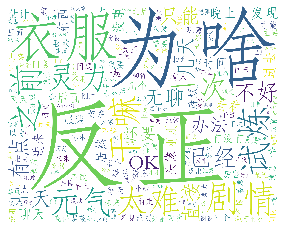

In [9]:
object_list = []
# 将词组转化为列表
for i in words:
    if len(i) != 1:
        if i not in stopWords:
            object_list.append(i)

# 词频读取需要增加空格
wl_split = ' '.join(object_list)

# 设置云词图格式
wc1 = WordCloud(
                background_color="white",
                width=2000,
                height=1600,
                font_path="C:\\Windows\\Fonts\\STFANGSO.ttf",
                margin=2)
# 生成云词图
mywc = wc1.generate(wl_split)
plt.imshow(mywc)
plt.axis('off')
plt.show